In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv')
df.head()

,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
0,26,1,20.1,81,5.80,4.36,0.86,0.90,2.43,12.0,63.8,5.40
1,40,1,17.7,54,4.60,3.70,1.02,1.50,2.04,9.2,70.3,4.10
2,40,2,19.7,53,5.30,5.87,1.29,1.75,3.37,10.1,61.1,4.85
3,43,1,23.1,71,4.50,4.05,0.74,1.27,2.60,36.5,73.4,5.30
4,36,1,26.5,82,5.54,6.69,3.49,0.91,3.64,69.3,67.5,5.53


### 1-1 EDA를 시행하라

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     4303 non-null   int64  
 1   Gender  4303 non-null   int64  
 2   BMI     4303 non-null   float64
 3   DBP     4303 non-null   int64  
 4   FPG     4303 non-null   float64
 5   Chol    4302 non-null   float64
 6   Tri     4303 non-null   float64
 7   HDL     4303 non-null   float64
 8   LDL     4303 non-null   float64
 9   ALT     4303 non-null   float64
 10  CCR     4303 non-null   float64
 11  FFPG    4303 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 403.5 KB


In [3]:
df.isna().sum()

Age       0
Gender    0
BMI       0
DBP       0
FPG       0
Chol      1
Tri       0
HDL       0
LDL       0
ALT       0
CCR       0
FFPG      0
dtype: int64

In [4]:
df.describe()

,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4302.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,76.360446,5.226368,4.860732,1.588476,1.666765,2.976220,26.754810,71.557080,5.729084
std,14.686155,0.477530,3.397294,11.004056,0.781089,0.925484,1.260003,1.079377,0.892196,22.279922,16.937394,1.424568
min,22.000000,1.000000,15.600000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,4.860753,3.200000
25%,35.000000,1.000000,21.700000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,60.000000,4.900000
50%,46.000000,1.000000,24.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,72.000000,5.300000
75%,59.000000,2.000000,26.300000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,82.300000,6.020000
max,93.000000,2.000000,45.800000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,307.000000,29.700000


모든 데이터는 수치형 데이터이지만 Gender와 Age는 범주형 변수이고, Chol 변수에만 결측치가 1개 존재하는 것을 확인할 수 있다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

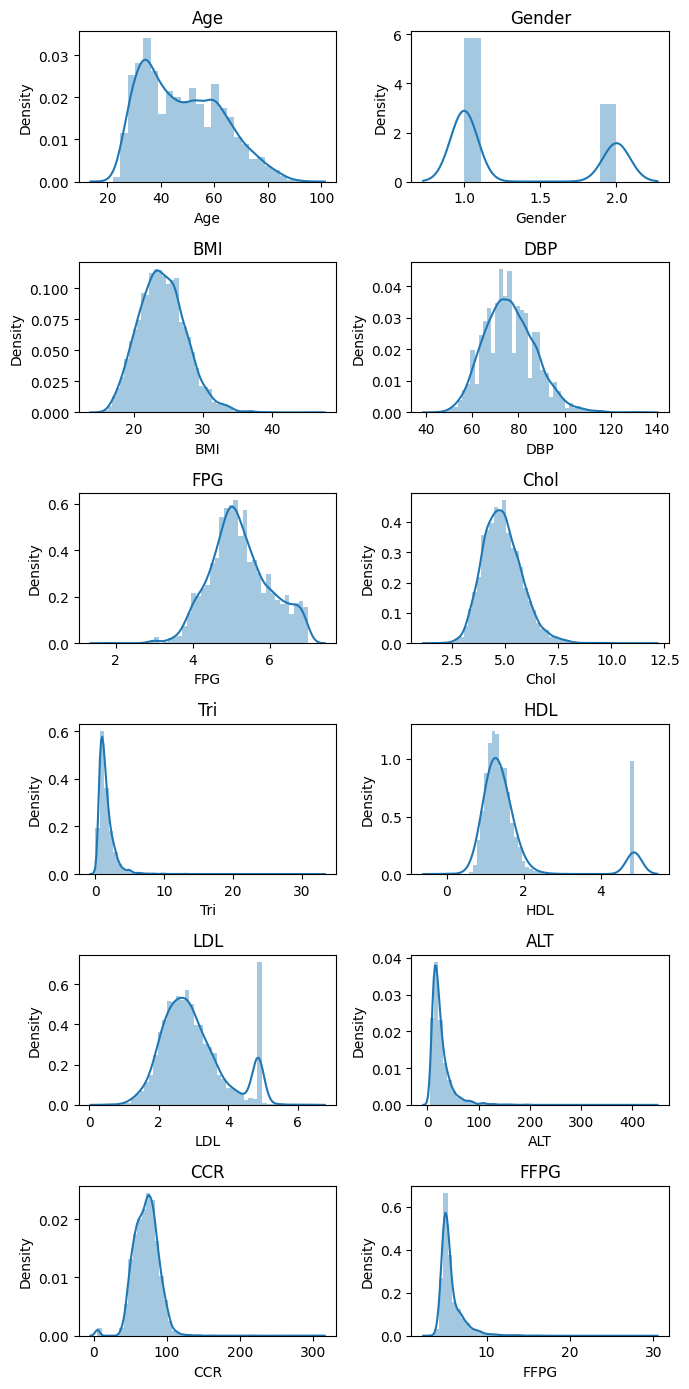

In [6]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(7, 14))

for idx, col in enumerate(df.columns):
    plt.subplot(6, 2, idx+1)
    plt.title(col)
    sns.distplot(df[col])
    
plt.tight_layout()
plt.show();

대부분의 데이터의 분포가 왼쪽으로 쏠려있는 것을 확인할 수 있다.

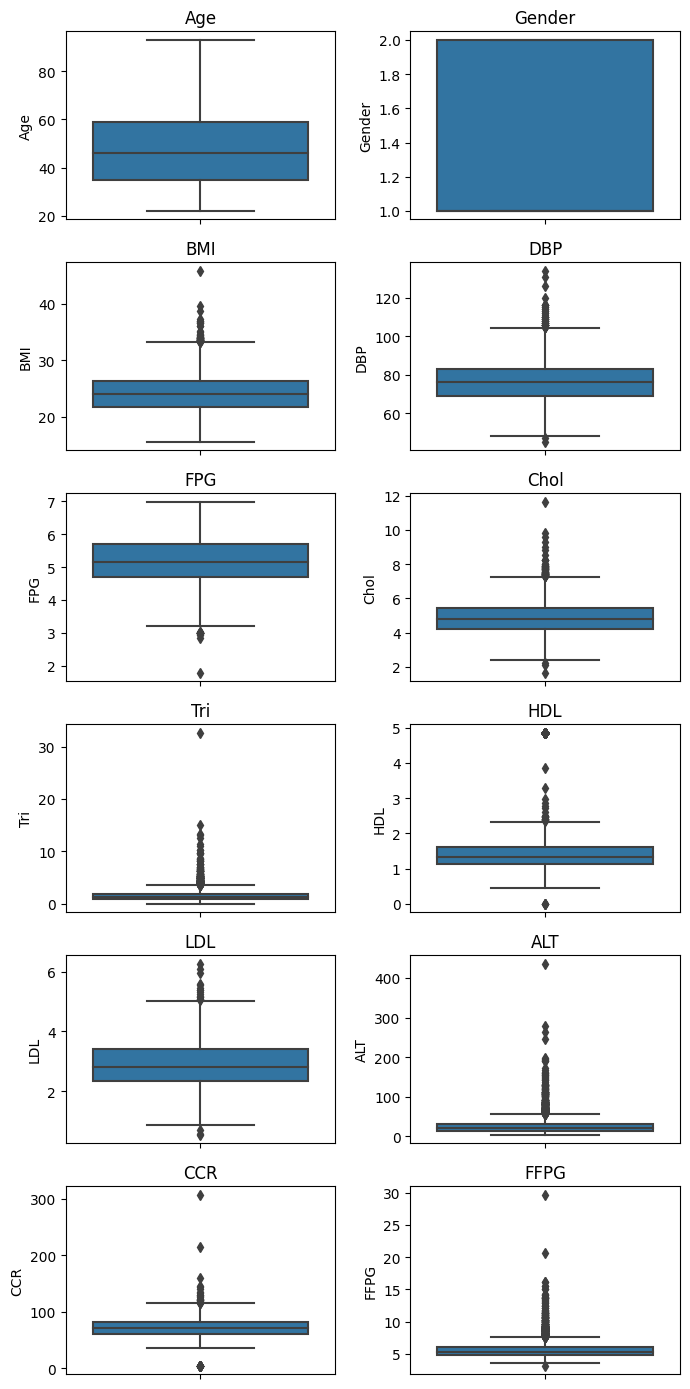

In [7]:
plt.figure(figsize=(7, 14))

for idx, col in enumerate(df.columns):
    plt.subplot(6, 2, idx+1)
    plt.title(col)
    sns.boxplot(y=df[col])
    
plt.tight_layout()
plt.show();

IQR 범위를 초과하는 값에 대해서 이상값인지 아닌지 판별이 필요해 보인다.

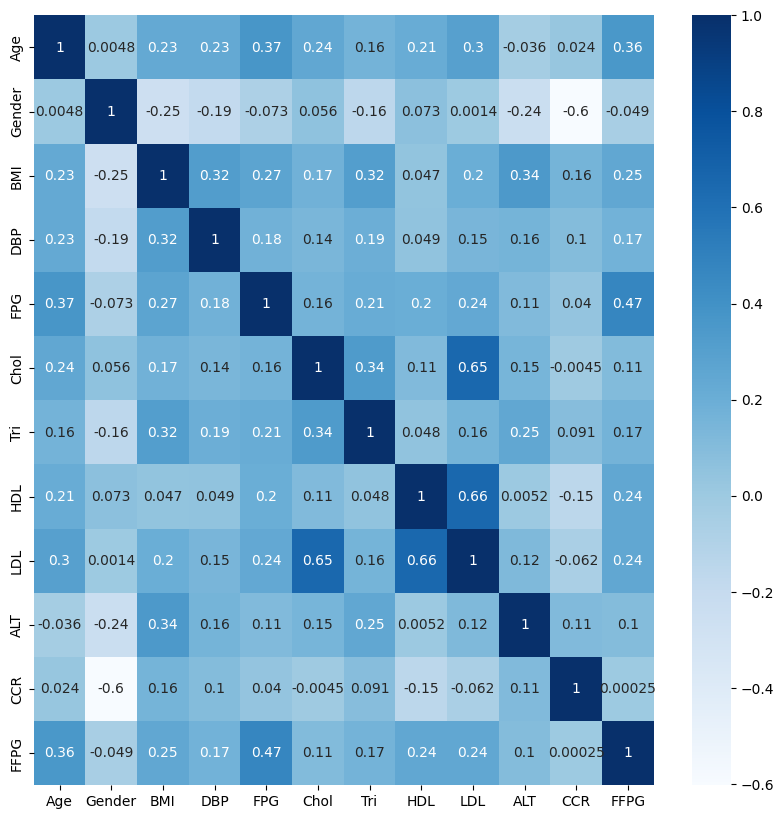

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show();

상관관계를 시각화해본 결과, 다중공선성을 의심할만한 변수는 없다고 볼 수 있고, 변수 중에는 HDL-LDL과 Chol-LDL 간 상관관계가 높다고 볼 수 있겠다

### 1-2 데이터 전처리가 필요하다면 수행하고 이유를 작성하라

In [9]:
df.loc[9:11]
DBP	FPG	Chol	Tri	HDL	LDL	ALT	CCR	FFPG
76.360446	5.226368	4.860732	1.588476	1.666765	2.976220	26.754810	71.557080	5.729084

SyntaxError: invalid syntax (1637827082.py, line 2)

결측값 데이터가 하나 포함되어있었기 때문에 제거 혹은 대체를 진행해야 머신러닝 모델에 데이터를 입력할 수 있다. 따라서 결측값 처리를 실시해야 한다. 또한 변수별 데이터 스케일이 다르므로 이를 고르게 만들기 위한 데이터 스케일링도 진행해야 한다. 데이터 스케일링은 데이터 누수를 방지하기 위해 Train-Test Set을 나눈 다음 적용한다.

### 1-3 train test set을 DBP컬럼 기준으로 7:3 비율로 나누고 잘 나뉘었는지 통계적으로 나타내라

### 2-1 독립변수의 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

train = df.drop(columns=['DBP'])
label = df[['DBP']]

[variance_inflation_factor(train.values, i) for i in range(len(train.columns))]

In [ ]:
df.drop(columns=['DBP'])

차원축소는 독립변수들 간에 상관관계가 높아 독립변수들 간 영향을 미치는 다중공선성을 제거하기 위해 필요하다. 다중공선성은 VIF 값이 10 이상일 경우나 상관계수의 값이 0.9 혹은 -0.9 이상일 때 존재한다고 판단할 수 있다. 

### 2-2 작업 후 데이터가 회귀분석의 기본가정 따르는지 설명